# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Incorportaed datetime to determine the date of analysis
import datetime
today = datetime.date.today()

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f'There is {len(cities)} in the list.')

# # Testing:
# for i in range(len(cities)):
#     if i%50 == 0:
#         print(cities[i])
#     if i == len(cities) - 1:
#         print(cities[i])
        
# print(requests.get(url = "http://api.openweathermap.org/data/2.5/weather?appid=" + weather_api_key + "&units=metric&q=" + 'rikitea').json())

There is 588 in the list.


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# Get the number of sets needed in the for loop
total_set_num = (len(cities) // 50) + 1

# Set up the lists which will be used to create dataframe
city = []
lat = []
lon = []
city = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []
failed_counter = 0
url = "http://api.openweathermap.org/data/2.5/weather?appid=" + weather_api_key + "&units=metric&q="

# Start to extracting cities' weather info
print('Beginning Data Retrieval')
print('-----------------------------')

for set_counter in range(total_set_num):
    
    # Use try and except block to prevent the code from stopping when the set does not have 50 records
    try:    
        
        # For each record, use openweather API to get access to all the information and append to corresponding lists
        for record_counter in range(50):
            
            # The counter represent the actual index the city is in the cities list 
            counter = set_counter * 50 + record_counter
            
            # Print the current set and record index
            print(f'Processing Record {record_counter + 1} of Set {set_counter + 1} | {cities[counter]}')

            # Use try and except block to prevent the code from stopping when a city cannot be found
            try:
                
                # Get the query url and make a call
                query_url = url + cities[counter]
                weather_json = requests.get(query_url, time.sleep(1)).json()
                
                # Append to lists
                lat.append(weather_json["coord"]["lat"])
                lon.append(weather_json["coord"]["lon"])
                max_temp.append(weather_json["main"]["temp_max"])
                humidity.append(weather_json["main"]["humidity"])
                cloudiness.append(weather_json["clouds"]["all"])
                wind_speed.append(weather_json["wind"]["speed"])
                country.append(weather_json["sys"]["country"])
                date.append(weather_json["dt"])
                city.append(cities[counter])
            
            # If city not found, print it out, and increment to the failed counter
            except KeyError:

                print('City not found. Skipping...')
                failed_counter += 1
            
            # (For testing)If any other error, print it out
            except:
                
                print('Unexpected Error')
    
    # Break out from the loop once the IndexError was found
    except IndexError:
        
        break
        
# Print out the number of cities found and not found
print('-----------------------------')
print(f'There are {failed_counter} cities not found. {len(cities) - failed_counter} cities in dataframe.')
print('Data Retrieval Complete')      
print('-----------------------------')

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | lasa
Processing Record 2 of Set 1 | meulaboh
Processing Record 3 of Set 1 | iqaluit
Processing Record 4 of Set 1 | rikitea
Processing Record 5 of Set 1 | coquimbo
Processing Record 6 of Set 1 | leningradskiy
Processing Record 7 of Set 1 | kaman
Processing Record 8 of Set 1 | tessalit
Processing Record 9 of Set 1 | bluff
Processing Record 10 of Set 1 | vardo
Processing Record 11 of Set 1 | katsuura
Processing Record 12 of Set 1 | albany
Processing Record 13 of Set 1 | olinda
Processing Record 14 of Set 1 | tianpeng
Processing Record 15 of Set 1 | teeli
Processing Record 16 of Set 1 | norman wells
Processing Record 17 of Set 1 | gussago
Processing Record 18 of Set 1 | yellowknife
Processing Record 19 of Set 1 | lewisporte
Processing Record 20 of Set 1 | snasa
Processing Record 21 of Set 1 | lagoa
Processing Record 22 of Set 1 | karaton
Processing Record 23 of Set 1 | cabra
Processing Record 24 of Set 1 

City not found. Skipping...
Processing Record 41 of Set 4 | illoqqortoormiut
City not found. Skipping...
Processing Record 42 of Set 4 | killybegs
Processing Record 43 of Set 4 | ribeira grande
Processing Record 44 of Set 4 | chesma
Processing Record 45 of Set 4 | katherine
Processing Record 46 of Set 4 | inuvik
Processing Record 47 of Set 4 | uniontown
Processing Record 48 of Set 4 | damietta
Processing Record 49 of Set 4 | honiara
Processing Record 50 of Set 4 | sheboygan
Processing Record 1 of Set 5 | palana
Processing Record 2 of Set 5 | yulara
Processing Record 3 of Set 5 | marcona
City not found. Skipping...
Processing Record 4 of Set 5 | dicabisagan
Processing Record 5 of Set 5 | baiyin
Processing Record 6 of Set 5 | bilma
Processing Record 7 of Set 5 | comodoro rivadavia
Processing Record 8 of Set 5 | vancouver
Processing Record 9 of Set 5 | irece
Processing Record 10 of Set 5 | samusu
City not found. Skipping...
Processing Record 11 of Set 5 | joshimath
Processing Record 12 of

Processing Record 30 of Set 8 | tarauaca
Processing Record 31 of Set 8 | lata
Processing Record 32 of Set 8 | srednekolymsk
Processing Record 33 of Set 8 | havoysund
Processing Record 34 of Set 8 | gat
Processing Record 35 of Set 8 | agde
Processing Record 36 of Set 8 | port blair
Processing Record 37 of Set 8 | wangqing
Processing Record 38 of Set 8 | kalabo
Processing Record 39 of Set 8 | tecoanapa
Processing Record 40 of Set 8 | saint-pierre
Processing Record 41 of Set 8 | konin
Processing Record 42 of Set 8 | leshukonskoye
Processing Record 43 of Set 8 | jacareacanga
Processing Record 44 of Set 8 | mayo
Processing Record 45 of Set 8 | ambodifototra
City not found. Skipping...
Processing Record 46 of Set 8 | karkaralinsk
City not found. Skipping...
Processing Record 47 of Set 8 | khatanga
Processing Record 48 of Set 8 | terme
Processing Record 49 of Set 8 | lakes entrance
Processing Record 50 of Set 8 | margate
Processing Record 1 of Set 9 | grindavik
Processing Record 2 of Set 9 | 

Processing Record 15 of Set 12 | thessalon
Processing Record 16 of Set 12 | moquegua
Processing Record 17 of Set 12 | grand gaube
Processing Record 18 of Set 12 | fruitville
Processing Record 19 of Set 12 | port hedland
Processing Record 20 of Set 12 | toliary
City not found. Skipping...
Processing Record 21 of Set 12 | antipovka
Processing Record 22 of Set 12 | lalmohan
Processing Record 23 of Set 12 | porto novo
Processing Record 24 of Set 12 | tyrma
Processing Record 25 of Set 12 | belyy yar
Processing Record 26 of Set 12 | lensk
Processing Record 27 of Set 12 | anju
Processing Record 28 of Set 12 | tselinnoye
Processing Record 29 of Set 12 | qurayyat
Processing Record 30 of Set 12 | faanui
Processing Record 31 of Set 12 | vysha
Processing Record 32 of Set 12 | abu zabad
Processing Record 33 of Set 12 | kuytun
Processing Record 34 of Set 12 | zaraza
Processing Record 35 of Set 12 | san gabriel
Processing Record 36 of Set 12 | subaytilah
City not found. Skipping...
Processing Record 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# Create the dataframe from the lists we generated from last cell
cities_dict = {'City': city,
               'Latitude' : lat,
               'Longitude' : lon,
               'Max Temperature (°C)': max_temp,
               'Humidity (%)': humidity,
               'Cloudiness (%)': cloudiness,
               'Wind Speed (MPH)': wind_speed,
               'Country': country,
               'Date': date
              }
cities_df = pd.DataFrame(cities_dict)

# Save the dataframe to a csv file
csv_path = 'output_data/cities.csv'
cities_df.to_csv(csv_path)

# Display the dataframe
cities_df

,City,Latitude,Longitude,Max Temperature (°C),Humidity (%),Cloudiness (%),Wind Speed (MPH),Country,Date
0,lasa,46.6166,10.7002,3.89,86,0,1.46,IT,1612557716
1,meulaboh,4.1363,96.1285,24.67,88,15,2.09,ID,1612558008
2,iqaluit,63.7506,-68.5145,-5.00,80,75,11.83,CA,1612557749
3,rikitea,-23.1203,-134.9692,26.11,68,1,4.77,PF,1612557959
4,coquimbo,-29.9533,-71.3436,20.00,64,20,5.66,CL,1612557752
...,...,...,...,...,...,...,...,...,...
532,abu zabad,12.3500,29.2500,17.41,28,21,7.87,SD,1612558617
533,kuytun,54.3419,101.5036,-18.60,91,86,1.03,RU,1612558617
534,zaraza,9.3503,-65.3245,31.96,45,100,4.55,VE,1612558617
535,san gabriel,34.0961,-118.1058,22.22,30,1,2.33,US,1612558392


In [6]:
# Show a statistics on the dataframe
cities_df.describe()

,Latitude,Longitude,Max Temperature (°C),Humidity (%),Cloudiness (%),Wind Speed (MPH),Date
count,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000,5.370000e+02
mean,22.038750,20.460148,8.991546,73.713222,53.642458,3.827132,1.612558e+09
std,33.742948,93.466927,18.352138,19.312524,39.485245,2.627352,2.475199e+02
min,-54.800000,-179.166700,-40.980000,13.000000,0.000000,0.170000,1.612558e+09
25%,-6.216700,-65.712500,-2.000000,65.000000,9.000000,1.790000,1.612558e+09
50%,29.274700,24.666700,14.970000,78.000000,74.000000,3.220000,1.612559e+09
75%,51.033300,106.270800,23.960000,88.000000,90.000000,5.140000,1.612559e+09
max,78.218600,178.416700,37.780000,100.000000,100.000000,14.310000,1.612559e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
# Drop any row which has a humidity higher than 100%
cleaned_cities_df = cities_df.loc[cities_df['Humidity (%)'] <= 100]
cleaned_cities_df

,City,Latitude,Longitude,Max Temperature (°C),Humidity (%),Cloudiness (%),Wind Speed (MPH),Country,Date
0,lasa,46.6166,10.7002,3.89,86,0,1.46,IT,1612557716
1,meulaboh,4.1363,96.1285,24.67,88,15,2.09,ID,1612558008
2,iqaluit,63.7506,-68.5145,-5.00,80,75,11.83,CA,1612557749
3,rikitea,-23.1203,-134.9692,26.11,68,1,4.77,PF,1612557959
4,coquimbo,-29.9533,-71.3436,20.00,64,20,5.66,CL,1612557752
...,...,...,...,...,...,...,...,...,...
532,abu zabad,12.3500,29.2500,17.41,28,21,7.87,SD,1612558617
533,kuytun,54.3419,101.5036,-18.60,91,86,1.03,RU,1612558617
534,zaraza,9.3503,-65.3245,31.96,45,100,4.55,VE,1612558617
535,san gabriel,34.0961,-118.1058,22.22,30,1,2.33,US,1612558392


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

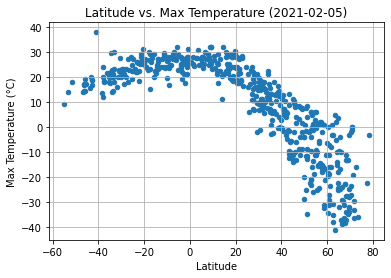

In [8]:
# Plot the scatter plot that shows the relation between latitude and max temperature, and include the date in title
cleaned_cities_df.plot(kind='scatter', x='Latitude', y='Max Temperature (°C)', 
                       title=f'Latitude vs. Max Temperature ({today})')
plt.grid()
plt.savefig('output_data/Latitude_MaxTemperature_Plot.png')

The plot have shown that the max temperature increases as the latitude of the place approaching the interval of -20 to 20. The higher the latitude, the lower the temperature.

## Latitude vs. Humidity Plot

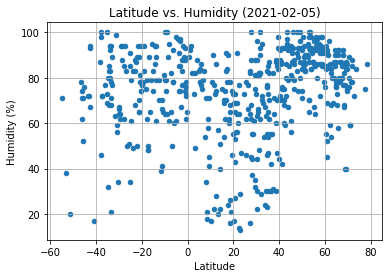

In [9]:
# Plot the scatter plot that shows the relation between latitude and humidity, and include the date in title
cleaned_cities_df.plot(kind='scatter', x='Latitude', y='Humidity (%)', 
                       title=f'Latitude vs. Humidity ({today})')
plt.grid()
plt.savefig('output_data/Latitude_Humidity_Plot.png')

Most of the cities tend to have a humidity above 60%, while the humidity of those cities with latitude between 0 to 40 tends to vary more. Cities with latitude between 40 to 80 often have a humidity between 80% to 100%.

## Latitude vs. Cloudiness Plot

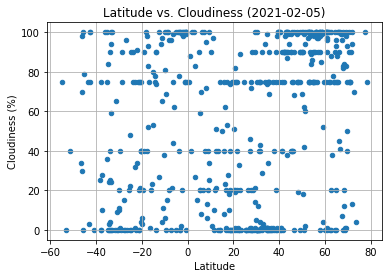

In [10]:
# Plot the scatter plot that shows the relation between latitude and cloudiness, and include the date in title
cleaned_cities_df.plot(kind='scatter', x='Latitude', y='Cloudiness (%)', 
                       title=f'Latitude vs. Cloudiness ({today})')
plt.grid()
plt.savefig('output_data/Latitude_Cloudiness_Plot.png')

The cities with latitude 40 to 80 tends to have a cloudiness clustering at 80% to 100%. However, the rest of the data points seem to distributed evenly on the plot. Hence, there isn't much of a correlation between coludiness and latitude. 

## Latitude vs. Wind Speed Plot

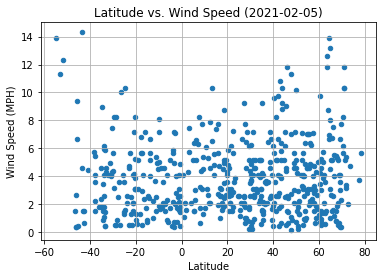

In [11]:
# Plot the scatter plot that shows the relation between latitude and wind speed, and include the date in title
cleaned_cities_df.plot(kind='scatter', x='Latitude', y='Wind Speed (MPH)', 
                       title=f'Latitude vs. Wind Speed ({today})')
plt.grid()
plt.savefig('output_data/Latitude_WindSpeed_Plot.png')

Most of the cities has a wind speed of 0MPH to 8MPH, with some cities at a higher(positive and negative) latitude having higher wind speed.

## Linear Regression

In [12]:
# Split the dataframe into two based on the latitude
north_cities_df = cleaned_cities_df.loc[cleaned_cities_df['Latitude'] >= 0]
south_cities_df = cleaned_cities_df.loc[cleaned_cities_df['Latitude'] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is 0.7665968309210495
The linear regression model is y = -0.85x + 37.42


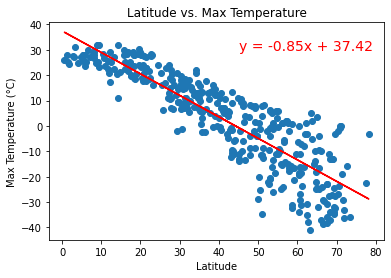

In [13]:
# Plot the linear regression model between latitude and max temperature in the northern hemisphere
north_cities_df.plot(kind='scatter', x='Latitude', y='Max Temperature (°C)', title='Latitude vs. Max Temperature')

# Find the linear regression model and print it to the scatter plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_cities_df['Latitude'], north_cities_df['Max Temperature (°C)'])
regress_values = north_cities_df['Latitude'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(north_cities_df['Latitude'], north_cities_df['Max Temperature (°C)'])
plt.plot(north_cities_df['Latitude'],regress_values,"r-")
plt.annotate(line_eq, (45, 30),fontsize=14,color="red")

print(f'The r-squared is {rvalue**2}')
print(f'The linear regression model is {line_eq}')

In the northern hemisphere, the max temperature decreases while the city is away from 0 degree latitude.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is 0.3517781024061891
The linear regression model is y = 0.2x + 27.52


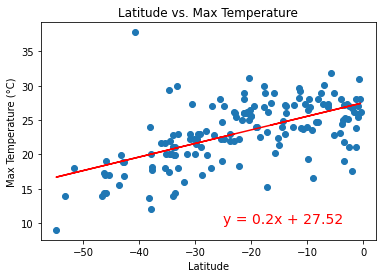

In [15]:
# Plot the linear regression model between latitude and max temperature in the southern hemisphere
south_cities_df.plot(kind='scatter', x='Latitude', y='Max Temperature (°C)', title='Latitude vs. Max Temperature')

# Find the linear regression model and print it to the scatter plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_cities_df['Latitude'], south_cities_df['Max Temperature (°C)'])
regress_values = south_cities_df['Latitude'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(south_cities_df['Latitude'], south_cities_df['Max Temperature (°C)'])
plt.plot(south_cities_df['Latitude'],regress_values,"r-")
plt.annotate(line_eq,(-25,10),fontsize=14,color="red")

print(f'The r-squared is {rvalue**2}')
print(f'The linear regression model is {line_eq}')

In the southern hemisphere, the max temperature increases while the city is close to 0 degree latitude.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is 0.15519609313678948
The linear regression model is y = 0.41x + 56.35


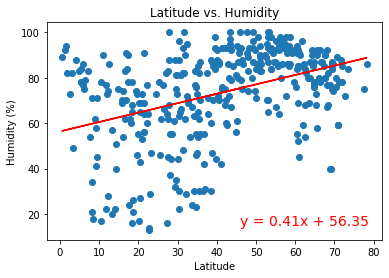

In [17]:
# Plot the linear regression model between latitude and humidity in the northern hemisphere
north_cities_df.plot(kind='scatter', x='Latitude', y='Humidity (%)', title='Latitude vs. Humidity')

# Find the linear regression model and print it to the scatter plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_cities_df['Latitude'], north_cities_df['Humidity (%)'])
regress_values = north_cities_df['Latitude'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(north_cities_df['Latitude'], north_cities_df['Humidity (%)'])
plt.plot(north_cities_df['Latitude'],regress_values,"r-")
plt.annotate(line_eq,(46,15),fontsize=14,color="red")

print(f'The r-squared is {rvalue**2}')
print(f'The linear regression model is {line_eq}')

In the northern hemisphere, the humidity increases while the city is away from 0 degree latitude.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is 0.03942947854649675
The linear regression model is y = 0.24x + 80.0


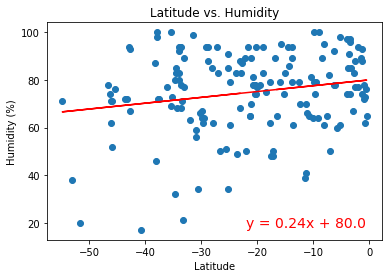

In [19]:
# Plot the linear regression model between latitude and humidity in the southern hemisphere
south_cities_df.plot(kind='scatter', x='Latitude', y='Humidity (%)', title='Latitude vs. Humidity')

# Find the linear regression model and print it to the scatter plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_cities_df['Latitude'], south_cities_df['Humidity (%)'])
regress_values = south_cities_df['Latitude'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(south_cities_df['Latitude'], south_cities_df['Humidity (%)'])
plt.plot(south_cities_df['Latitude'],regress_values,"r-")
plt.annotate(line_eq,(-22,18),fontsize=14,color="red")

print(f'The r-squared is {rvalue**2}')
print(f'The linear regression model is {line_eq}')

In the southern hemisphere, the humidity slightly increases while the city is close to 0 degree latitude.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is 0.13713657572566496
The linear regression model is y = 0.76x + 24.27


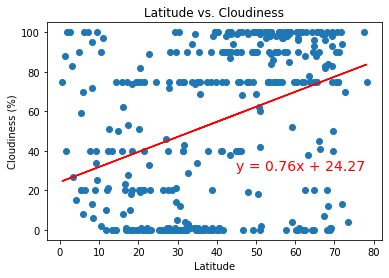

In [21]:
# Plot the linear regression model between latitude and cloudiness in the northern hemisphere
north_cities_df.plot(kind='scatter', x='Latitude', y='Cloudiness (%)', title='Latitude vs. Cloudiness')

# Find the linear regression model and print it to the scatter plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_cities_df['Latitude'], north_cities_df['Cloudiness (%)'])
regress_values = north_cities_df['Latitude'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(north_cities_df['Latitude'], north_cities_df['Cloudiness (%)'])
plt.plot(north_cities_df['Latitude'],regress_values,"r-")
plt.annotate(line_eq,(45,30),fontsize=14,color="red")

print(f'The r-squared is {rvalue**2}')
print(f'The linear regression model is {line_eq}')

In the northern hemisphere, the cloudiness tend to increase while the city is away from 0 degree latitude.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is 0.05610768122334169
The linear regression model is y = 0.68x + 64.29


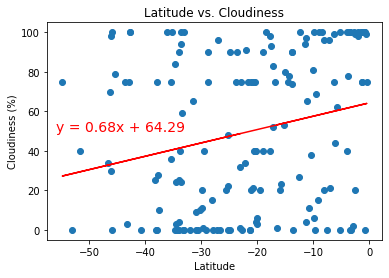

In [23]:
# Plot the linear regression model between latitude and cloudiness in the southern hemisphere
south_cities_df.plot(kind='scatter', x='Latitude', y='Cloudiness (%)', title='Latitude vs. Cloudiness')

# Find the linear regression model and print it to the scatter plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_cities_df['Latitude'], south_cities_df['Cloudiness (%)'])
regress_values = south_cities_df['Latitude'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(south_cities_df['Latitude'], south_cities_df['Cloudiness (%)'])
plt.plot(south_cities_df['Latitude'],regress_values,"r-")
plt.annotate(line_eq,(-56,50),fontsize=14,color="red")

print(f'The r-squared is {rvalue**2}')
print(f'The linear regression model is {line_eq}')

In the southern hemisphere, the cloudiness tend to increases while the city is close to 0 degree latitude.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is 0.003943709470024695
The linear regression model is y = 0.01x + 3.59


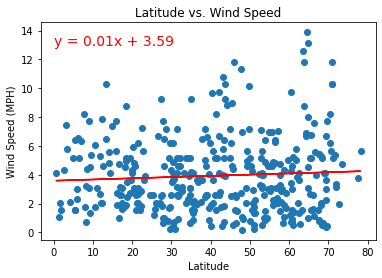

In [26]:
# Plot the linear regression model between latitude and wind speed in the northern hemisphere
north_cities_df.plot(kind='scatter', x='Latitude', y='Wind Speed (MPH)', title='Latitude vs. Wind Speed')

# Find the linear regression model and print it to the scatter plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_cities_df['Latitude'], north_cities_df['Wind Speed (MPH)'])
regress_values = north_cities_df['Latitude'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(north_cities_df['Latitude'], north_cities_df['Wind Speed (MPH)'])
plt.plot(north_cities_df['Latitude'],regress_values,"r-")
plt.annotate(line_eq,(0,13),fontsize=14,color="red")

print(f'The r-squared is {rvalue**2}')
print(f'The linear regression model is {line_eq}')

In the northern hemisphere, the wind speed is not really affected while the city is away from 0 degree latitude.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is 0.04936492550896515
The linear regression model is y = -0.04x + 2.64


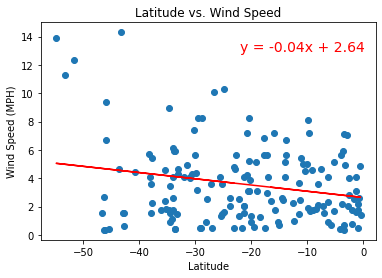

In [28]:
# Plot the linear regression model between latitude and wind speed in the southern hemisphere
south_cities_df.plot(kind='scatter', x='Latitude', y='Wind Speed (MPH)', title='Latitude vs. Wind Speed')

# Find the linear regression model and print it to the scatter plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_cities_df['Latitude'], south_cities_df['Wind Speed (MPH)'])
regress_values = south_cities_df['Latitude'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(south_cities_df['Latitude'], south_cities_df['Wind Speed (MPH)'])
plt.plot(south_cities_df['Latitude'],regress_values,"r-")
plt.annotate(line_eq,(-22,13),fontsize=14,color="red")

print(f'The r-squared is {rvalue**2}')
print(f'The linear regression model is {line_eq}')

In the southern hemisphere, the wind speed is not really affected(even have a slightly steeper slope) while the city is close to 0 degree latitude.